In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Automobile_insurance_fraud.csv')
print(df)

     months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [4]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             


In this data _c39 having the null values.

In [5]:
df.shape

(1000, 40)

In [6]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

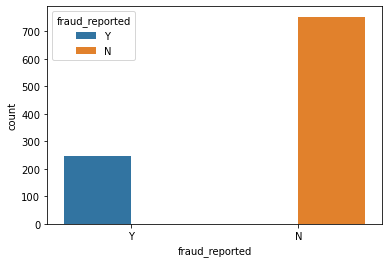

In [7]:
sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')

As per the data output it is imbalanced.

In [8]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

fraud_reported people are less, Compare to fraud_reported.

In [9]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

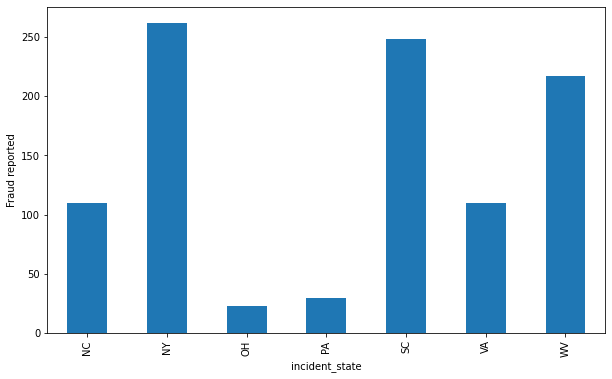

In [10]:
fig=plt.figure(figsize=(10,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

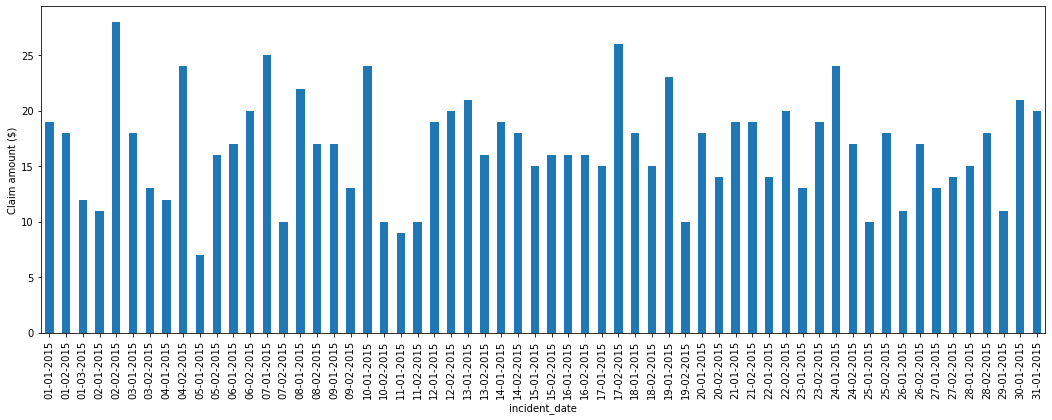

In [11]:
fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

We can observe that claim amount is more in the incident_date on 02-02-2015.

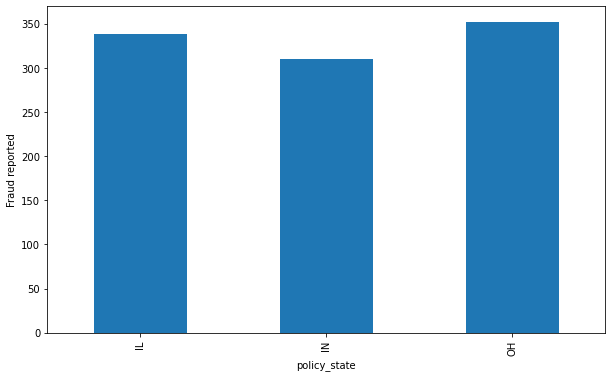

In [12]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

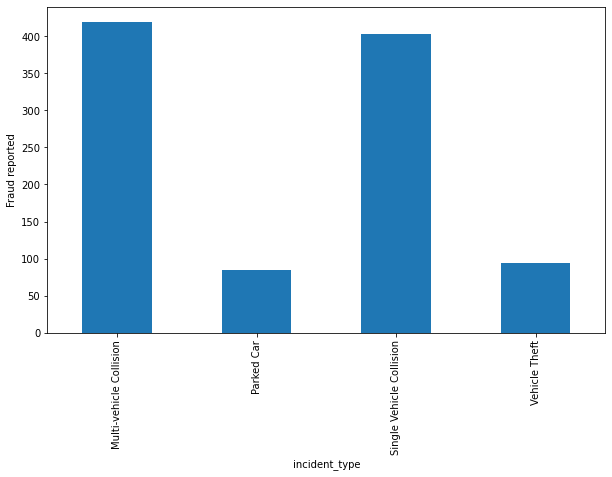

In [13]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

From this we can observe that most fraud are reported as Multiple Vehicle Collision.

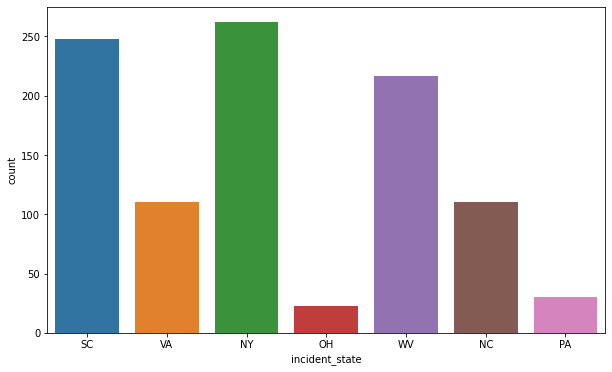

In [14]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_state', data=df)

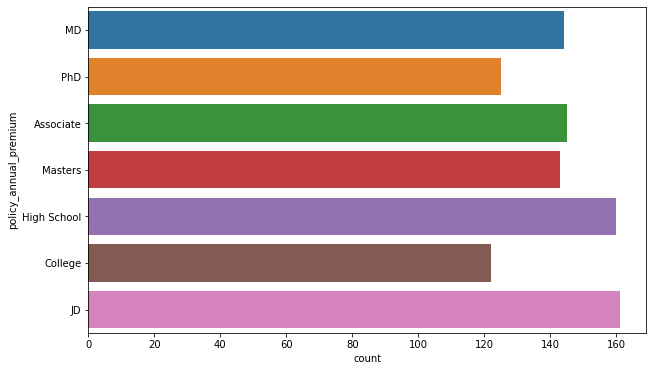

In [15]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'insured_education_level', data=df) 
ax.set_ylabel('policy_annual_premium')
plt.show()

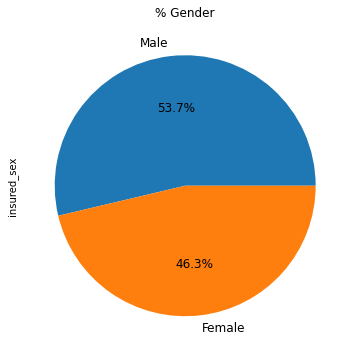

In [16]:
fig = plt.figure(figsize=(10,6))
ax = (df['insured_sex'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('% Gender')
plt.show()

Mostly Male are insured more.

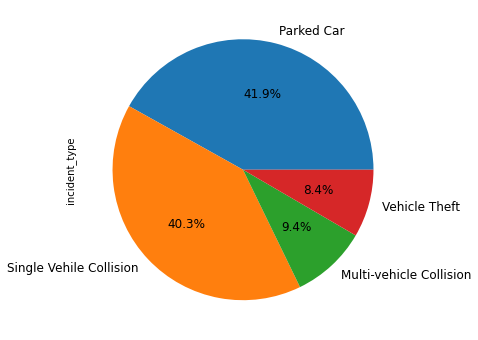

In [17]:
fig = plt.figure(figsize=(10,6))
ax = (df['incident_type'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'],
         fontsize=12)

Insurance claimed mosty on Parked Car

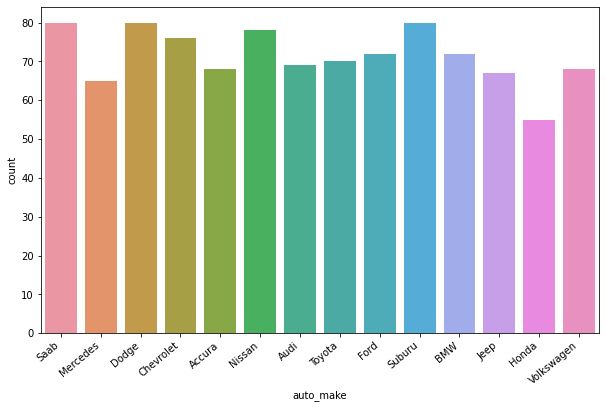

In [18]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='auto_make', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

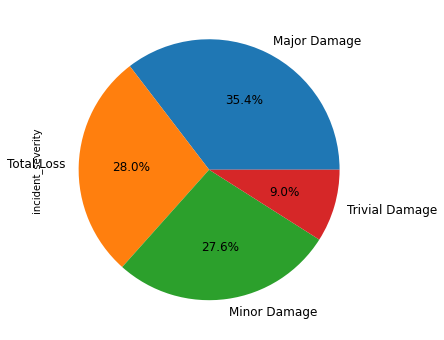

In [19]:
fig = plt.figure(figsize=(10,6))
ax = (df['incident_severity'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=12)

from this we can observe that the insurance almost 35% are Major Damage.

In [20]:
df["insured_occupation"].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

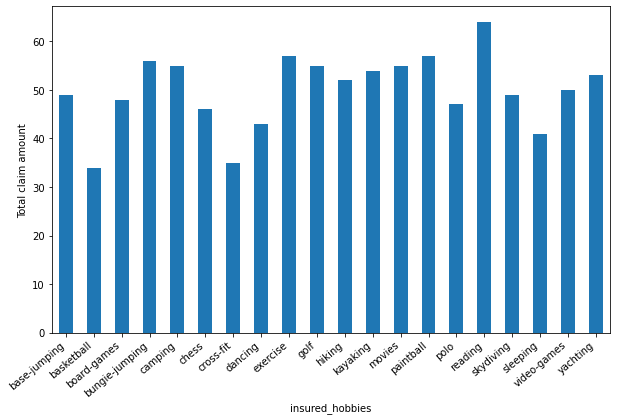

In [21]:
fig = plt.figure(figsize=(10,6))
ax= df.groupby('insured_hobbies').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Total claim amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [22]:
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,1,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,1,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,0,NaN


In [23]:
df[['insured_zip']] = df[['insured_zip']].astype(object)

In [24]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000,NaN


In [25]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [26]:
df=df.drop(['insured_zip','policy_bind_date','incident_date','incident_date'],axis=1)

In [27]:
df.auto_year.value_counts()

1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [28]:
df['vehicle_age'] = 2018 - df['auto_year'] # Deriving the age of the vehicle based on the year value 
df['vehicle_age'].head(10)

0    14
1    11
2    11
3     4
4     9
5    15
6     6
7     3
8     6
9    22
Name: vehicle_age, dtype: int64

In [29]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
df['incident_period_of_day'] = pd.cut(df.incident_hour_of_the_day, bins, labels=names).astype(object)
df[['incident_hour_of_the_day', 'incident_period_of_day']].head(20)

,incident_hour_of_the_day,incident_period_of_day
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening
5,19,evening
6,0,past_midnight
7,23,night
8,21,night
9,14,afternoon


In [30]:
df.select_dtypes(include=['object']).columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'incident_period_of_day'],
      dtype='object')

In [31]:
df = df.drop(columns = [
    'policy_number',  
    '_c39', 
    'auto_year', 
    'incident_hour_of_the_day'])

df.head(2)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,YES,71610,6510,13020,52080,Saab,92x,1,14,early_morning
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,?,5070,780,780,3510,Mercedes,E400,1,11,morning


In [32]:
unknowns = {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
incident_location          0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
incident_period_of_day     0


From this data we came know that unknown values in collision_type,property_damage,police_report_available.

In [33]:
df.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

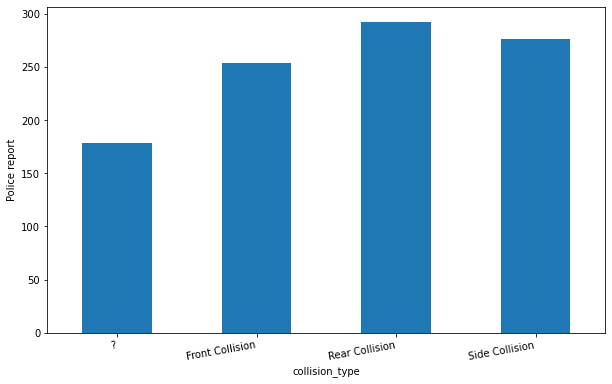

In [34]:
fig = plt.figure(figsize=(10,6))
ax= df.groupby('collision_type').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

In [35]:
df.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

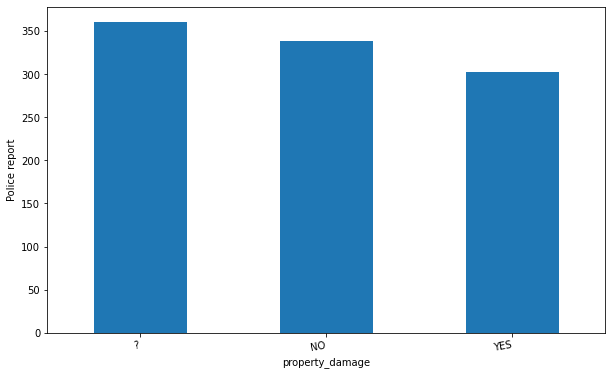

In [36]:
fig = plt.figure(figsize=(10,6))
ax= df.groupby('property_damage').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

In [37]:
df.police_report_available.value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [38]:
df.columns.value_counts()

auto_model                     1
police_report_available        1
number_of_vehicles_involved    1
capital-loss                   1
incident_location              1
incident_city                  1
authorities_contacted          1
incident_period_of_day         1
capital-gains                  1
insured_sex                    1
policy_csl                     1
property_claim                 1
months_as_customer             1
incident_state                 1
insured_occupation             1
property_damage                1
incident_type                  1
collision_type                 1
witnesses                      1
vehicle_age                    1
umbrella_limit                 1
insured_relationship           1
injury_claim                   1
insured_education_level        1
age                            1
vehicle_claim                  1
total_claim_amount             1
auto_make                      1
incident_severity              1
fraud_reported                 1
bodily_inj

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

In [40]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make 

# Label Encoding

In [41]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [42]:
for i in df.columns:
    df[i]=le.fit_transform(df[i])
    df

In [43]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day
0,299,29,2,1,1,732,1,1,4,2,...,2,563,258,512,545,10,1,1,11,1
1,212,23,1,1,2,396,5,1,4,6,...,0,44,46,45,38,8,12,1,8,4
2,123,10,2,0,2,740,5,0,6,11,...,1,143,337,104,116,4,30,0,8,4
3,239,22,0,1,2,743,6,0,6,1,...,1,451,245,249,521,3,34,1,1,1
4,212,25,0,2,1,902,6,1,0,11,...,1,81,70,36,66,0,31,0,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,19,2,2,1,577,1,0,5,2,...,0,705,624,379,664,6,6,0,9,2
996,266,22,0,0,1,765,1,0,6,9,...,0,760,630,608,714,13,28,0,0,5
997,119,15,2,1,0,691,3,0,5,1,...,2,507,324,330,554,11,19,0,19,1
998,377,43,0,2,2,652,5,1,0,5,...,2,224,168,170,256,1,5,0,17,6


In [44]:
unknowns = {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

Empty DataFrame
Columns: []
Index: []


In [45]:
df.describe(include='all')

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,184.283000,19.948000,1.01400,0.951000,0.965000,495.735000,1.900000,0.463000,2.966000,6.653000,...,0.971000,368.330000,289.050000,287.730000,347.164000,6.546000,19.318000,0.247000,9.897000,2.822000
std,99.894954,9.140287,0.83096,0.804516,0.805247,285.876467,1.917205,0.498879,1.948497,4.019048,...,0.810442,218.145411,189.104368,182.969481,209.404851,4.034869,11.136107,0.431483,6.015861,2.187945
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,104.750000,13.000000,0.00000,0.000000,0.000000,247.750000,1.000000,0.000000,1.000000,3.000000,...,0.000000,183.750000,123.750000,127.750000,163.750000,3.000000,10.000000,0.000000,5.000000,1.000000
50%,185.500000,19.000000,1.00000,1.000000,1.000000,496.500000,1.000000,0.000000,3.000000,7.000000,...,1.000000,372.500000,276.500000,281.000000,351.500000,7.000000,20.000000,0.000000,10.000000,3.000000
75%,257.250000,25.000000,2.00000,2.000000,2.000000,742.250000,1.000000,1.000000,5.000000,10.000000,...,2.000000,548.250000,455.250000,446.250000,523.250000,10.000000,29.000000,0.000000,15.000000,5.000000
max,390.000000,45.000000,2.00000,2.000000,2.000000,990.000000,10.000000,1.000000,6.000000,13.000000,...,2.000000,762.000000,637.000000,625.000000,725.000000,13.000000,38.000000,1.000000,20.000000,6.000000


In [46]:
df.corr()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day
months_as_customer,1.000000,0.911296,-0.000783,-0.026295,0.016873,0.014294,0.017145,0.059153,0.000265,0.010330,...,0.020082,0.055934,0.064041,0.029788,0.052742,0.044443,0.001095,0.017095,-0.002020,-0.054275
age,0.911296,1.000000,-0.014533,-0.015185,0.020561,0.017822,0.021924,0.073337,0.000969,0.017220,...,0.014661,0.071265,0.075124,0.060450,0.059784,0.030410,0.017343,0.012143,-0.001354,-0.022988
policy_state,-0.000783,-0.014533,1.000000,0.001027,0.008213,0.014751,-0.031793,-0.020481,-0.034327,-0.031215,...,0.071950,-0.015990,-0.042685,0.009282,-0.007492,0.017124,-0.025253,0.029432,-0.002114,-0.034415
policy_csl,-0.026295,-0.015185,0.001027,1.000000,0.001986,0.017161,0.022779,-0.010757,0.009153,0.015788,...,0.002424,-0.043541,-0.076419,-0.041428,-0.027320,-0.004701,0.047885,-0.037190,0.033082,0.002433
policy_deductable,0.016873,0.020561,0.008213,0.001986,1.000000,0.003182,0.009402,-0.011948,0.012000,-0.053245,...,0.030654,0.020877,0.028482,0.058976,0.004261,-0.030775,-0.003892,0.007620,-0.024921,0.013505
policy_annual_premium,0.014294,0.017822,0.014751,0.017161,0.003182,1.000000,-0.003712,0.034839,-0.016601,0.028204,...,0.014816,-0.001025,-0.021839,-0.006593,0.009413,0.007216,-0.030185,-0.015261,0.031015,-0.004169
umbrella_limit,0.017145,0.021924,-0.031793,0.022779,0.009402,-0.003712,1.000000,0.009733,-0.019668,0.024072,...,-0.055340,-0.036495,-0.048003,-0.018668,-0.031991,-0.007169,0.042421,0.057719,-0.010528,0.004104
insured_sex,0.059153,0.073337,-0.020481,-0.010757,-0.011948,0.034839,0.009733,1.000000,0.009002,-0.006160,...,0.020864,-0.021761,0.001792,-0.009003,-0.031984,0.026457,-0.018421,0.030873,0.028247,-0.039054
insured_education_level,0.000265,0.000969,-0.034327,0.009153,0.012000,-0.016601,-0.019668,0.009002,1.000000,-0.020298,...,0.036141,0.073526,0.079108,0.057098,0.071132,0.055202,0.049445,0.008808,-0.043509,0.023937
insured_occupation,0.010330,0.017220,-0.031215,0.015788,-0.053245,0.028204,0.024072,-0.006160,-0.020298,1.000000,...,-0.011083,0.010091,0.024307,0.000353,0.003834,0.042621,0.020584,0.001564,0.006676,0.052618


<AxesSubplot:>

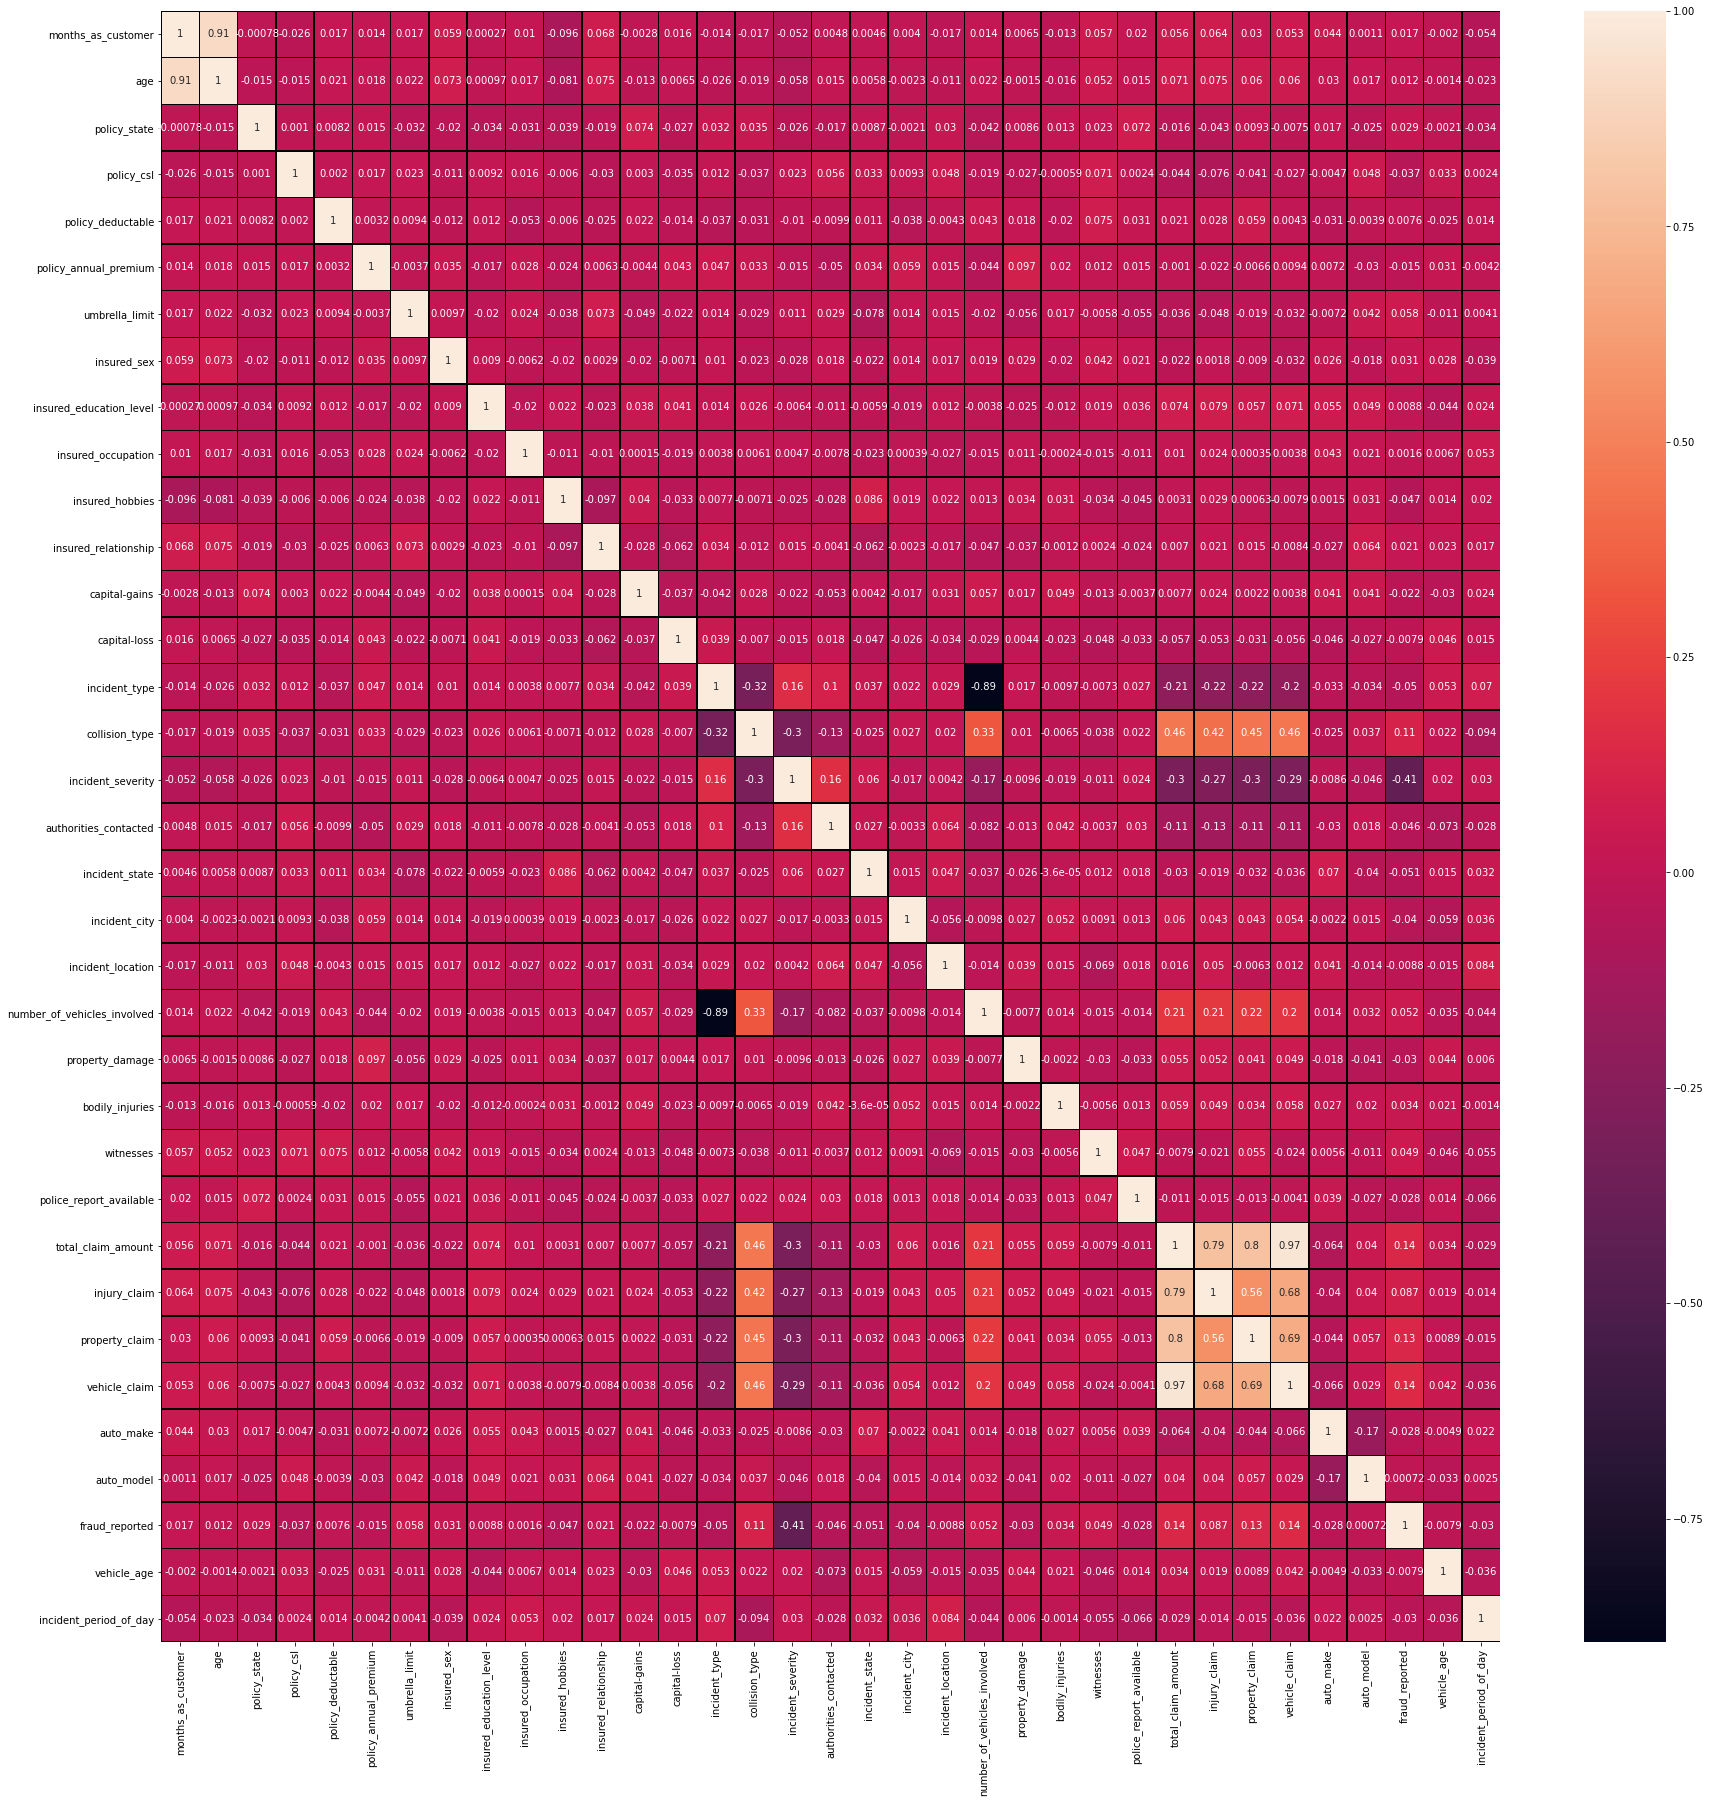

In [47]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black')

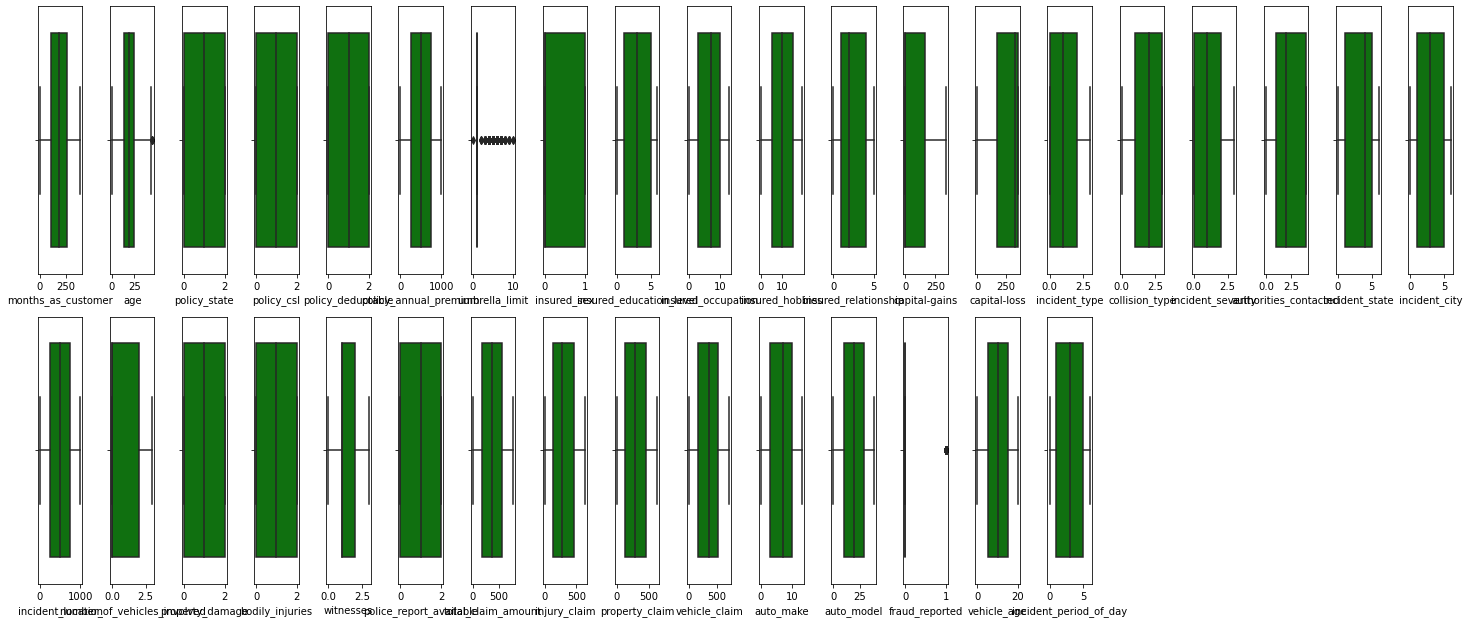

In [48]:
collist=df.columns.values
ncol=20
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [49]:
from scipy.stats import zscore
import numpy as np

In [50]:
z=np.abs(zscore(df))
z

array([[1.14895094, 0.99083647, 1.18717314, ..., 1.74601919, 0.1834404 ,
        0.83316159],
       [0.2776003 , 0.33407345, 0.01685641, ..., 1.74601919, 0.31549088,
        0.53867418],
       [0.6137814 , 1.08891308, 1.18717314, ..., 0.57273139, 0.31549088,
        0.53867418],
       ...,
       [0.65384349, 0.54161057, 1.18717314, ..., 0.57273139, 1.5139238 ,
        0.83316159],
       [1.93016186, 2.52328351, 1.22088596, ..., 0.57273139, 1.18130295,
        1.45323135],
       [1.92014633, 2.3043625 , 1.18717314, ..., 0.57273139, 0.31549088,
        0.83316159]])

In [51]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 262, 314, 430, 458, 503, 657, 700, 875,
       922, 975], dtype=int64), array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], dtype=int64))


In [52]:
df_new=df[(z<3) .all(axis=1)]
df_new

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day
0,299,29,2,1,1,732,1,1,4,2,...,2,563,258,512,545,10,1,1,11,1
1,212,23,1,1,2,396,5,1,4,6,...,0,44,46,45,38,8,12,1,8,4
2,123,10,2,0,2,740,5,0,6,11,...,1,143,337,104,116,4,30,0,8,4
3,239,22,0,1,2,743,6,0,6,1,...,1,451,245,249,521,3,34,1,1,1
4,212,25,0,2,1,902,6,1,0,11,...,1,81,70,36,66,0,31,0,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,19,2,2,1,577,1,0,5,2,...,0,705,624,379,664,6,6,0,9,2
996,266,22,0,0,1,765,1,0,6,9,...,0,760,630,608,714,13,28,0,0,5
997,119,15,2,1,0,691,3,0,5,1,...,2,507,324,330,554,11,19,0,19,1
998,377,43,0,2,2,652,5,1,0,5,...,2,224,168,170,256,1,5,0,17,6


In [53]:
print(df.shape)
print(df_new.shape)

(1000, 35)
(985, 35)


In [54]:
loss_percent=(1000-985)/1000*100
print(loss_percent)

1.5


In [55]:
df_new.skew()

months_as_customer             0.096656
age                            0.480506
policy_state                  -0.036054
policy_csl                     0.093953
policy_deductable              0.060667
policy_annual_premium         -0.001693
umbrella_limit                 1.902038
insured_sex                    0.144759
insured_education_level        0.004685
insured_occupation            -0.052412
insured_hobbies               -0.061536
insured_relationship           0.077333
capital-gains                  0.880109
capital-loss                  -0.807319
incident_type                  0.091063
collision_type                -0.194288
incident_severity              0.281858
authorities_contacted         -0.113349
incident_state                -0.151360
incident_city                  0.045660
incident_location             -0.003796
number_of_vehicles_involved    0.509302
property_damage                0.108209
bodily_injuries                0.005614
witnesses                      0.018336


<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

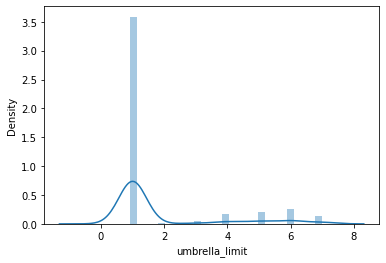

In [56]:
sns.distplot(df_new['umbrella_limit'])

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

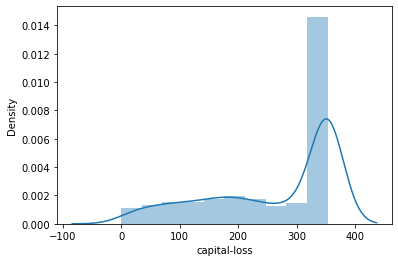

In [57]:
sns.distplot(df_new['capital-loss'])

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

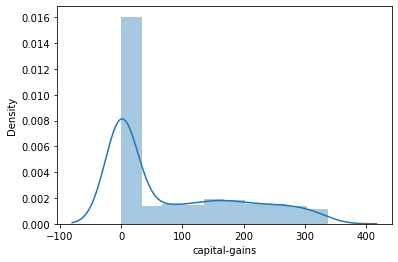

In [58]:
sns.distplot(df_new['capital-gains'])

Need to check VIF factor

If it is more than 20 try to remove the columns

In [59]:
x=df_new.drop(['fraud_reported'],axis=1)
y=df_new['fraud_reported']

In [60]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 985, dtype: int64

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
x.shape

(985, 34)

In [63]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [64]:
vif_calc()

    VIF Factor                     features
0    26.793170           months_as_customer
1    34.429544                          age
2     2.516224                 policy_state
3     2.432444                   policy_csl
4     2.474241            policy_deductable
5     4.041209        policy_annual_premium
6     2.112931               umbrella_limit
7     1.902684                  insured_sex
8     3.373080      insured_education_level
9     3.646897           insured_occupation
10    3.930242              insured_hobbies
11    3.081331         insured_relationship
12    1.672043                capital-gains
13    6.094568                 capital-loss
14    9.207526                incident_type
15    5.882830               collision_type
16    2.894738            incident_severity
17    3.193619        authorities_contacted
18    3.339717               incident_state
19    3.184020                incident_city
20    4.106865            incident_location
21    7.158382  number_of_vehicl

Vehicle_claim and total_claim_amount are high variation factor so for better output removing those varaibles.

In [65]:
df_new=df_new.drop(['vehicle_claim','total_claim_amount'],axis=1)

In [66]:
x=df_new.drop(['fraud_reported'],axis=1)
y=df_new['fraud_reported']

In [67]:
y.value_counts()

0    744
1    241
Name: fraud_reported, dtype: int64

In [68]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method="yeo-johnson")

In [69]:
x

array([[ 1.10518143,  0.99373915,  1.14269011, ..., -1.8077551 ,
         0.27085715, -0.75157113],
       [ 0.3417534 ,  0.42295985,  0.06105674, ..., -0.57625941,
        -0.20894161,  0.61586558],
       [-0.53337777, -1.11449917,  1.14269011, ...,  0.95250811,
        -0.20894161,  0.61586558],
       ...,
       [-0.57605649, -0.45538469,  1.14269011, ...,  0.05568689,
         1.40145005, -0.75157113],
       [ 1.74027314,  2.14648084, -1.26509761, ..., -1.29884413,
         1.13408773,  1.31008973],
       [ 1.73236585,  1.99358851,  1.14269011, ..., -0.57625941,
        -0.20894161, -0.75157113]])

In [70]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
x=mn.fit_transform(x)
x

array([[0.82088735, 0.76582093, 1.        , ..., 0.04508919, 0.63233563,
        0.24583754],
       [0.63544962, 0.66319322, 0.5507771 , ..., 0.39457501, 0.49246927,
        0.74605047],
       [0.42287904, 0.38675379, 1.        , ..., 0.82842353, 0.49246927,
        0.74605047],
       ...,
       [0.41251232, 0.50526441, 1.        , ..., 0.57391488, 0.96191531,
        0.24583754],
       [0.97515201, 0.97308711, 0.        , ..., 0.18951289, 0.88397639,
        1.        ],
       [0.97323132, 0.94559664, 1.        , ..., 0.39457501, 0.49246927,
        0.24583754]])

In [71]:
print(x.shape)
print(y.shape)

(985, 32)
(985,)


In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [73]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(788, 32)
(788,)
(197, 32)
(197,)


In [74]:
from imblearn.over_sampling import SMOTE

In [75]:
smt=SMOTE()
x_train, y_train = smt.fit_resample(x_train, y_train)

In [76]:
x_train

array([[0.30008055, 0.4602917 , 0.5507771 , ..., 0.76148645, 0.84403741,
        0.60098355],
       [0.24908267, 0.36019901, 0.        , ..., 0.31104517, 0.54045865,
        0.        ],
       [0.78176598, 0.66319322, 1.        , ..., 0.        , 0.803386  ,
        0.        ],
       ...,
       [0.67504458, 0.69226686, 1.        , ..., 0.68882574, 0.65488801,
        0.87801712],
       [0.60218589, 0.55260545, 0.        , ..., 0.51728196, 0.56831514,
        0.45571529],
       [0.77660774, 0.76458795, 0.        , ..., 0.36930214, 0.72092526,
        0.43894975]])

In [77]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
1195    1
1196    1
1197    1
1198    1
1199    1
Name: fraud_reported, Length: 1200, dtype: int64

In [78]:
y_train.value_counts()

1    600
0    600
Name: fraud_reported, dtype: int64

In [79]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,f1_score

In [80]:
print(lm.fit(x_train,y_train))
print(lm.score(x_train,y_train))

LogisticRegression()
0.7683333333333333


In [81]:
pred=lm.predict(x_test)
print("predicted result score:",pred)
print("actual score:",y_test)

predicted result score: [1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1
 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0
 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0
 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1
 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 1]
actual score: 623    1
460    1
743    1
444    0
281    1
      ..
298    0
214    1
516    0
51     0
729    1
Name: fraud_reported, Length: 197, dtype: int64


In [82]:
print("Accuracy_score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('F1 score',f1_score(y_test,pred,average='micro'))

Accuracy_score: 0.6954314720812182
[[98 46]
 [14 39]]
              precision    recall  f1-score   support

           0       0.88      0.68      0.77       144
           1       0.46      0.74      0.57        53

    accuracy                           0.70       197
   macro avg       0.67      0.71      0.67       197
weighted avg       0.76      0.70      0.71       197

F1 score 0.6954314720812182


F1 score 0.7106598984771575

# Hyper Tuning the parameter

In [83]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lm_cv=GridSearchCV(lm,grid,cv=10)
lm_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",lm_cv.best_params_)
print("accuracy :",lm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.7575000000000001


After Hyper Tuning it will increase score from 71 to 77

In [84]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [85]:
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [86]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print(f.score(x_train,y_train))
    print('Accuracy::',accuracy_score(y_test,pred))
    print('confusion matrix\n',confusion_matrix(y_test,pred)) 
    print('classification report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred,average='micro'))

In [87]:
fun(svc)

0.9591666666666666
Accuracy:: 0.7309644670050761
confusion matrix
 [[120  24]
 [ 29  24]]
classification report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       144
           1       0.50      0.45      0.48        53

    accuracy                           0.73       197
   macro avg       0.65      0.64      0.65       197
weighted avg       0.72      0.73      0.73       197

F1 score 0.7309644670050761


In [88]:
fun(dtc)

1.0
Accuracy:: 0.7614213197969543
confusion matrix
 [[118  26]
 [ 21  32]]
classification report
               precision    recall  f1-score   support

           0       0.85      0.82      0.83       144
           1       0.55      0.60      0.58        53

    accuracy                           0.76       197
   macro avg       0.70      0.71      0.71       197
weighted avg       0.77      0.76      0.76       197

F1 score 0.7614213197969543


In [89]:
fun(knn)

0.7841666666666667
Accuracy:: 0.5228426395939086
confusion matrix
 [[68 76]
 [18 35]]
classification report
               precision    recall  f1-score   support

           0       0.79      0.47      0.59       144
           1       0.32      0.66      0.43        53

    accuracy                           0.52       197
   macro avg       0.55      0.57      0.51       197
weighted avg       0.66      0.52      0.55       197

F1 score 0.5228426395939086


F1 score 0.5431472081218274

In [90]:
from sklearn.model_selection import GridSearchCV
params = {"criterion":['gini','entropy'],"splitter":['best','random'],"max_features":['auto', 'sqrt', 'log2']}
grid_search_cv = GridSearchCV(dtc,param_grid=params)
grid_search_cv.fit(x,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)

{'criterion': 'entropy', 'max_features': 'log2', 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_features='log2')
0.7360406091370558


In [91]:
params={'kernel':['linear','rbf','poly','sigmoid']}
grid_search_cv = GridSearchCV(svc,param_grid=params,cv=10,verbose=1,n_jobs=-1)
grid_search_cv.fit(x,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
{'kernel': 'linear'}
SVC(kernel='linear')
0.8101834673263244


In [92]:
from sklearn.model_selection import GridSearchCV
params = {"n_neighbors":[7,5,11],"weights":['uniform','distance'],"algorithm":['auto', 'brute']}
grid_search_cv = GridSearchCV(knn,param_grid=params)
grid_search_cv.fit(x,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)

{'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=11)
0.7543147208121829


1.Dtc Hyper-tuning is 71 to 74

2.svc Hyper-tuning is 74 to 81.

3.Knn Hyper-tuning is 54 to 75

In [93]:
# Random Forest CLassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier

In [94]:
rf=RandomForestClassifier(n_estimators=100,random_state=4)
ad=AdaBoostClassifier()

In [95]:
fun(ad)

0.8958333333333334
Accuracy:: 0.7563451776649747
confusion matrix
 [[125  19]
 [ 29  24]]
classification report
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       144
           1       0.56      0.45      0.50        53

    accuracy                           0.76       197
   macro avg       0.68      0.66      0.67       197
weighted avg       0.74      0.76      0.75       197

F1 score 0.7563451776649746


F1 score 0.7614213197969543

In [96]:
fun(rf)

1.0
Accuracy:: 0.7969543147208121
confusion matrix
 [[123  21]
 [ 19  34]]
classification report
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       144
           1       0.62      0.64      0.63        53

    accuracy                           0.80       197
   macro avg       0.74      0.75      0.74       197
weighted avg       0.80      0.80      0.80       197

F1 score 0.796954314720812


F1 score 0.796954314720812

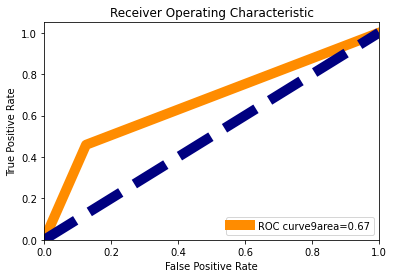

In [97]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve9area=%0.2f' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [98]:
#cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [99]:
for i in range(2,10):
    score=cross_val_score(lm,x,y,cv=i)
    print('At Value of',i,score.mean())

At Value of 2 0.7695439403684098
At Value of 3 0.7695375244025997
At Value of 4 0.7746247654784241
At Value of 5 0.7736040609137056
At Value of 6 0.7736018723823603
At Value of 7 0.7767260095527572
At Value of 8 0.7695548124836087
At Value of 9 0.7746918728570105


In [100]:
score=cross_val_score(lm,x,y,cv=10)
score.mean()

0.7685734900020614

In [101]:
score=cross_val_score(dtc,x,y,cv=10)
score.mean()

0.7899092970521542

In [102]:
score=cross_val_score(svc,x,y,cv=10)
score.mean()

0.7461863533292105

In [103]:
score=cross_val_score(rf,x,y,cv=10)
score.mean()

0.7735621521335807

In [104]:
score=cross_val_score(ad,x,y,cv=10)
score.mean()

0.8001133786848073

As per the cross value, We can have a look that accuracy and f1_score ad is giving best values.

# Saving The Model

In [105]:
import pickle
filename="loan_application.pkl"
pickle.dump(ad,open(filename,'wb'))

In [106]:
import numpy as np
a=np.array(y_test)
predicted=np.array(ad.predict(x_test))
df_com=pd.DataFrame({'orginal':a,'predicted':predicted},index=range(len(a)))

In [107]:
df_com

,orginal,predicted
0,1,1
1,1,0
2,1,1
3,0,0
4,1,0
...,...,...
192,0,0
193,1,1
194,0,0
195,0,0
